<a href="https://colab.research.google.com/github/Jaivik-Jariwala/Yard_managment_ai/blob/main/Container_Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
uploaded = files.upload()

Saving container.csv to container.csv


In [3]:
data = pd.read_csv('container.csv')

print("the Container Dataset successful")

the Container Dataset successful


In [4]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Location Status'] = label_encoder.fit_transform(data['Location Status'])


In [5]:
features = data[['Container Size', 'Area', 'Row', 'Bay', 'Level']]
labels = data['Location Status']


In [6]:
# Perform one-hot encoding on categorical columns
categorical_columns = ['Area', 'Bay']
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = onehot_encoder.fit_transform(features[categorical_columns])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
# Get the categories for the one-hot encoded columns
encoded_categories = onehot_encoder.categories_
encoded_feature_names = []
for i, col in enumerate(categorical_columns):
    for category in encoded_categories[i][1:]:  # Drop first category due to drop='first'
        encoded_feature_names.append(f"{col}_{category}")


In [8]:
encoded_features_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
features_encoded = pd.concat([features.drop(categorical_columns, axis=1), encoded_features_df], axis=1)



In [9]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    features_encoded, labels, test_size=0.2, random_state=42
)


In [10]:
# Standardize numerical features
scaler = StandardScaler()
X_class_train_scaled = scaler.fit_transform(X_class_train)
X_class_test_scaled = scaler.transform(X_class_test)


In [11]:
# Calculate the maximum sequence length
max_sequence_length = max(len(seq) for seq in X_class_train_scaled)
print("Maximum Sequence Length:", max_sequence_length)


Maximum Sequence Length: 19


In [12]:
X_class_train_padded = np.array([np.pad(seq, [(0, max_sequence_length - len(seq))], mode='constant') for seq in X_class_train_scaled])
X_class_test_padded = np.array([np.pad(seq, [(0, max_sequence_length - len(seq))], mode='constant') for seq in X_class_test_scaled])


In [13]:
# Build the LSTM classification model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_class_train_scaled.shape[1]))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
#Train the model
model.fit(X_class_train_scaled, y_class_train, epochs=32, batch_size=16, validation_data=(X_class_test_scaled, y_class_test))


Epoch 1/32
175/175 [==============================] - 6s 8ms/step - loss: 0.4919 - accuracy: 0.7614 - val_loss: 0.4254 - val_accuracy: 0.7686
Epoch 2/32
175/175 [==============================] - 1s 3ms/step - loss: 0.3875 - accuracy: 0.8321 - val_loss: 0.3803 - val_accuracy: 0.8243
Epoch 3/32
175/175 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.8521 - val_loss: 0.3533 - val_accuracy: 0.8500
Epoch 4/32
175/175 [==============================] - 1s 4ms/step - loss: 0.3246 - accuracy: 0.8682 - val_loss: 0.3324 - val_accuracy: 0.8471
Epoch 5/32
175/175 [==============================] - 1s 4ms/step - loss: 0.3063 - accuracy: 0.8696 - val_loss: 0.3240 - val_accuracy: 0.8571
Epoch 6/32
175/175 [==============================] - 1s 4ms/step - loss: 0.2945 - accuracy: 0.8800 - val_loss: 0.3169 - val_accuracy: 0.8543
Epoch 7/32
175/175 [==============================] - 1s 3ms/step - loss: 0.2844 - accuracy: 0.8818 - val_loss: 0.3098 - val_accuracy: 0.8571
Epoch 

In [15]:
# Build the regression model
regression_model = Sequential()
regression_model.add(Dense(64, activation='relu', input_dim=features_encoded.shape[1]))  # Adjust input_dim accordingly
regression_model.add(Dense(1))  # Output layer for regression
regression_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))


In [16]:
# Train the regression model
regression_model.fit(features_encoded, labels, epochs=32, batch_size=16, validation_split=0.2)

Epoch 1/32
175/175 [==============================] - 1s 3ms/step - loss: 4.3003 - val_loss: 0.5838
Epoch 2/32
175/175 [==============================] - 0s 3ms/step - loss: 0.2005 - val_loss: 0.4724
Epoch 3/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1570 - val_loss: 0.5238
Epoch 4/32
175/175 [==============================] - 0s 3ms/step - loss: 0.1459 - val_loss: 0.4520
Epoch 5/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.5442
Epoch 6/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.5475
Epoch 7/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.4564
Epoch 8/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.6120
Epoch 9/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1385 - val_loss: 0.5362
Epoch 10/32
175/175 [==============================] - 0s 3ms/step - loss: 0.1353 - val_loss: 0.5619

In [17]:
def optimize_placement(regression_predictions):
    # Assuming regression_predictions is a NumPy array of predictions
    # Predicted values of Area, Row, Bay, and Level
    predicted_area = regression_predictions[0]
    predicted_row = regression_predictions[1]
    predicted_bay = regression_predictions[2]
    predicted_level = regression_predictions[3]

    # Your optimization logic here
    # You mentioned the formula: optimized_placement = Area + Row + Bay + Level
    optimized_placement = predicted_area + predicted_row + predicted_bay + predicted_level

    return optimized_placement


In [18]:
def optimize_placement(regression_predictions):
    # Your optimization logic here
    optimized_placement = np.sum(regression_predictions)  # Sum of all predicted values
    return optimized_placement

# After training the regression model and getting predictions
regression_predictions = regression_model.predict(features_encoded)

# Call the optimization function
optimized_placement = optimize_placement(regression_predictions)
print("Optimized Placement:", optimized_placement)

110/110 [==============================] - 0s 2ms/step
Optimized Placement: 2200.069


In [19]:
# After training the regression model and getting predictions
regression_predictions = regression_model.predict(features_encoded)

# Call the optimization function for all predictions
optimized_placements = [optimize_placement(prediction) for prediction in regression_predictions]


110/110 [==============================] - 0s 3ms/step


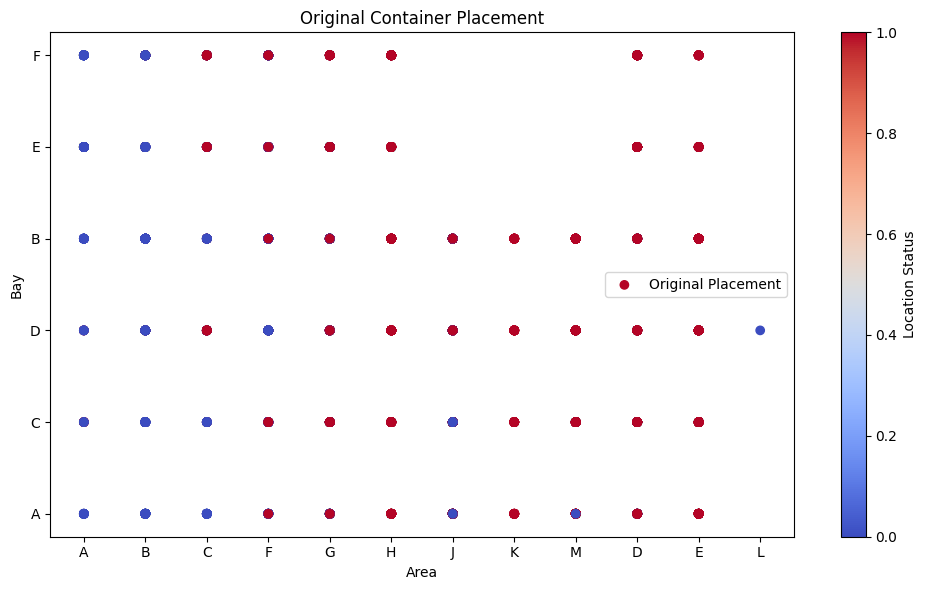

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(features['Area'], features['Bay'], c=labels, cmap='coolwarm', label='Original Placement')
plt.xlabel('Area')
plt.ylabel('Bay')
plt.title('Original Container Placement')
plt.colorbar(label='Location Status')
plt.legend()
plt.tight_layout()  # Add this line for better layout
plt.show()

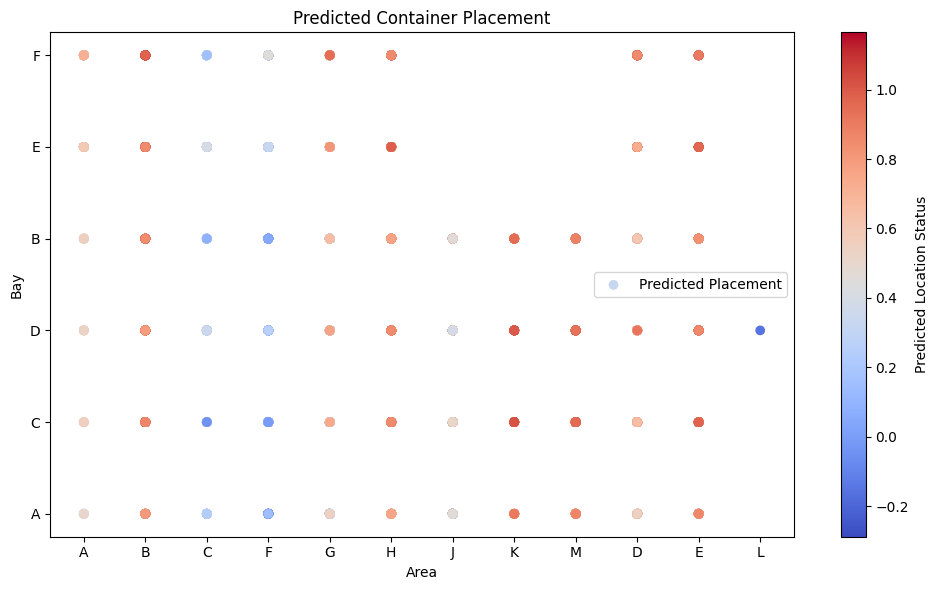

In [23]:
# Predicted placement
plt.figure(figsize=(10, 6))
plt.scatter(features['Area'], features['Bay'], c=regression_predictions, cmap='coolwarm', label='Predicted Placement')
plt.xlabel('Area')
plt.ylabel('Bay')
plt.title('Predicted Container Placement')
plt.colorbar(label='Predicted Location Status')
plt.legend()
plt.tight_layout()  # Add this line for better layout
plt.show()







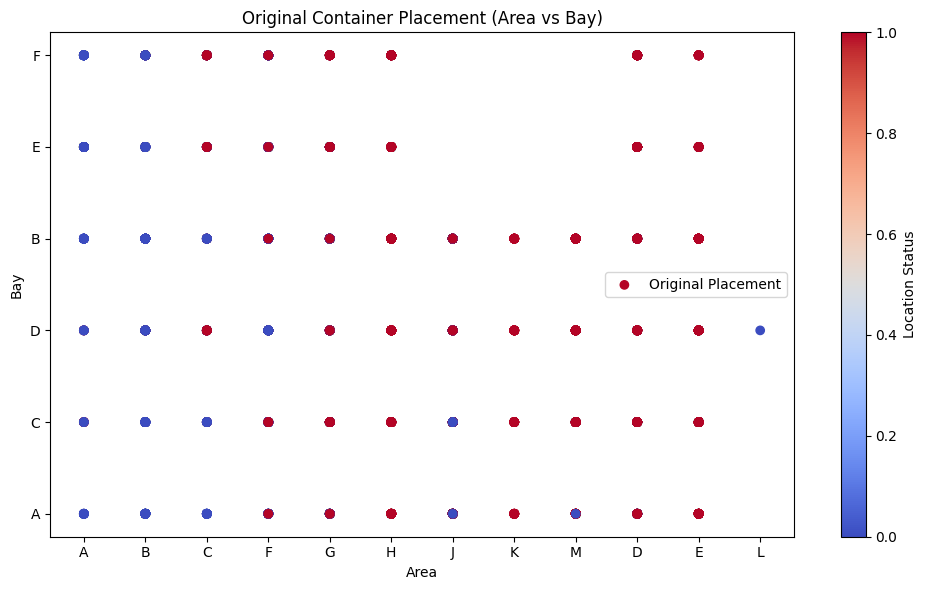

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(features['Area'], features['Bay'], c=labels, cmap='coolwarm', label='Original Placement')
plt.xlabel('Area')
plt.ylabel('Bay')
plt.title('Original Container Placement (Area vs Bay)')
plt.legend()
plt.colorbar(label='Location Status')
plt.tight_layout()  # Add this line for better layout
plt.show()

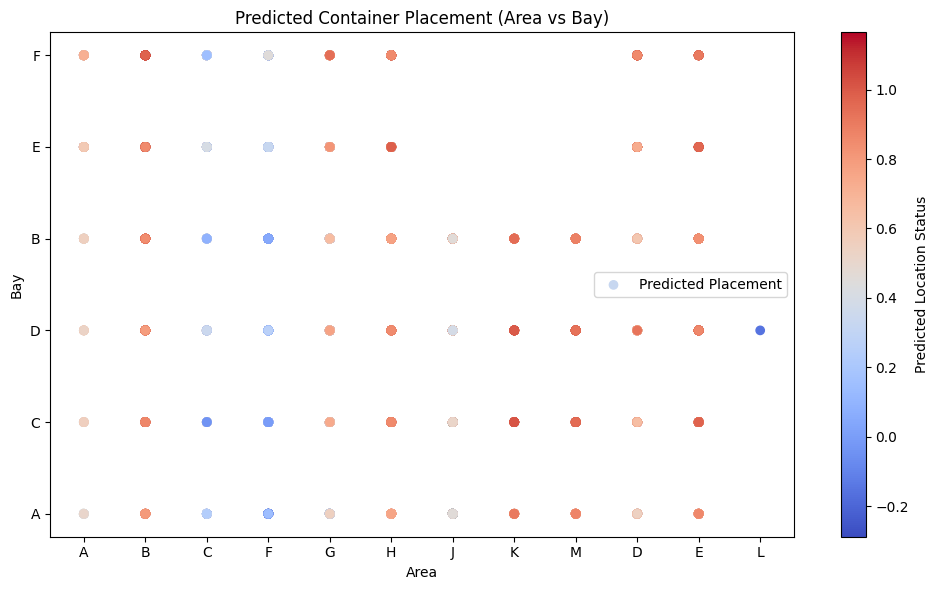

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(features['Area'], features['Bay'], c=regression_predictions, cmap='coolwarm', label='Predicted Placement')
plt.xlabel('Area')
plt.ylabel('Bay')
plt.title('Predicted Container Placement (Area vs Bay)')
plt.legend()
plt.colorbar(label='Predicted Location Status')
plt.tight_layout()  # Add this line for better layout
plt.show()

ValueError: ignored

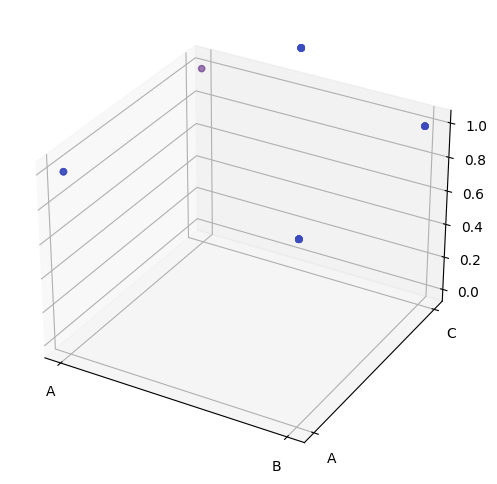

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(features['Area'], features['Bay'], features['Level'], c=labels, cmap='coolwarm', label='Original Placement')
ax.set_xlabel('Area')
ax.set_ylabel('Bay')
ax.set_zlabel('Level')
ax.set_title('Original Container Placement')
ax.legend()
plt.colorbar(sc, ax=ax, label='Location Status')
plt.tight_layout()  # Add this line for better layout
plt.show()


ValueError: ignored

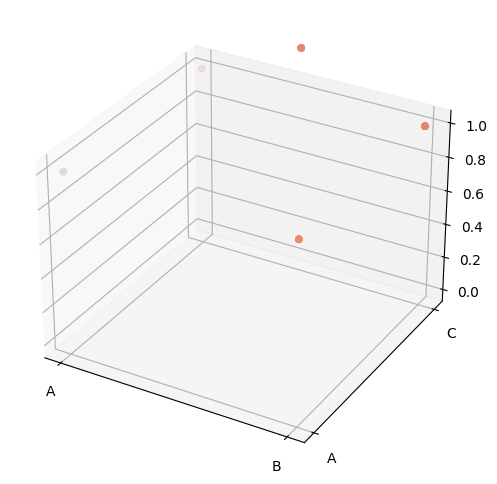

In [25]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(features['Area'], features['Bay'], features['Level'], c=regression_predictions, cmap='coolwarm', label='Predicted Placement')
ax.set_xlabel('Area')
ax.set_ylabel('Bay')
ax.set_zlabel('Level')
ax.set_title('Predicted Container Placement')
ax.legend()
plt.colorbar(sc, ax=ax, label='Predicted Location Status')
plt.tight_layout()  # Add this line for better layout
plt.show()

ValueError: ignored

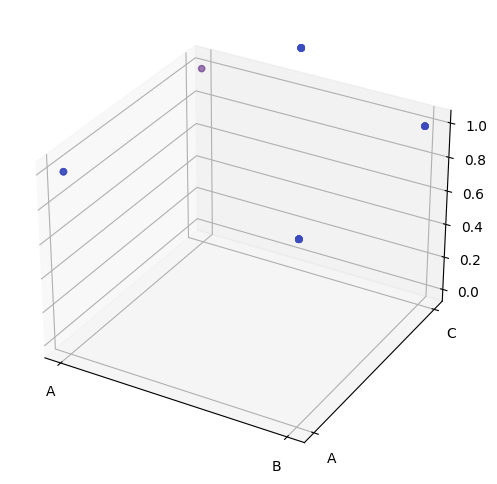

In [28]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(features['Area'], features['Bay'], features['Level'], c=labels, cmap='coolwarm', label='Original Placement')
ax.set_xlabel('Area')
ax.set_ylabel('Bay')
ax.set_zlabel('Level')
ax.set_title('Original Container Placement (Area vs Bay vs Level)')
ax.legend()
plt.colorbar(sc, ax=ax, label='Location Status')
plt.tight_layout()  # Add this line for better layout
plt.show()


ValueError: ignored

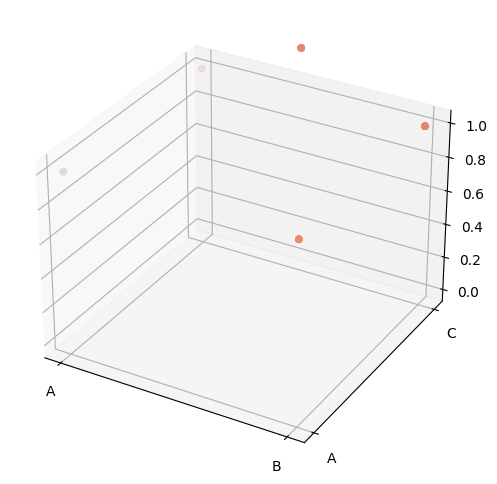

In [29]:
# Create a 3D scatter plot for predicted placement (Area vs Bay vs Level)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(features['Area'], features['Bay'], features['Level'], c=regression_predictions, cmap='coolwarm', label='Predicted Placement')
ax.set_xlabel('Area')
ax.set_ylabel('Bay')
ax.set_zlabel('Level')
ax.set_title('Predicted Container Placement (Area vs Bay vs Level)')
ax.legend()
plt.colorbar(sc, ax=ax, label='Predicted Location Status')
plt.tight_layout()  # Add this line for better layout
plt.show()